# MVC project: exploration
- This notebook explores data generated by matlab

## Todos
- homogeneity datasets

# 1. Import data

In [1]:
import mvc  # local functions (see mvc/ folder)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="ticks")
% matplotlib inline

In [2]:
data_path = '/media/romain/E/Projet_MVC/data/Final_output'
mat = mvc.fileio.ImportMat(data_path)

project 'Sylvain_2015' loaded (10 participants)
project 'Landry_2013' loaded (21 participants)
project 'Landry_2012' loaded (18 participants)
project 'Landry_2015_2' loaded (11 participants)
project 'Yoann_2015' loaded (22 participants)
project 'Landry_2015_1' loaded (14 participants)
project 'Patrick_2013' loaded (16 participants)
	total participants: 112


## Dimensions description

- `mat.data['Landry_2012']` contains the data with three dimensions:
$\text{participant}(n) \times \text{muscle}(12) \times \text{test}(15)$

In [3]:
# 3d matrix to lists
participants, datasets, muscles, tests, relative_mvc = ([] for i in range(5))

for idataset in list(mat.data.keys()):
    for iparticipant in range(mat.data[idataset].shape[0]):
        for imuscle in range(mat.data[idataset].shape[1]):
            max_mvc = np.nanmax(mat.data[idataset][iparticipant, imuscle, :])
            for itest in range(mat.data[idataset].shape[2]):
                participants.append(iparticipant+1)
                datasets.append(idataset)
                muscles.append(imuscle+1)
                tests.append(itest+1)
                # normalize mvc (relative to max)
                relative_mvc.append(mat.data[idataset][iparticipant, imuscle, itest]*100/max_mvc)

/home/romain/miniconda3/envs/mvc/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: All-NaN slice encountered


In [4]:
# lists to single dataframe
df = pd.DataFrame({
    'participant': participants,
    'dataset': datasets,
    'muscle': muscles,
    'test': tests,
    'relative_mvc': relative_mvc,
}).dropna()

df.head()

,dataset,muscle,participant,relative_mvc,test
0,Sylvain_2015,1,1,100.000000,1
1,Sylvain_2015,1,1,69.322225,2
2,Sylvain_2015,1,1,84.917656,3
3,Sylvain_2015,1,1,80.983069,4
4,Sylvain_2015,1,1,65.163384,5


## Data description

In [41]:
def table_count(d, values, index, columns):
    table = d.pivot_table(values, index, columns,
                          aggfunc=lambda x: len(x)/x.nunique(),
                          fill_value=0).astype(int)
    table.loc['total'] = table.sum(axis=0)
    table['n'] = (table != 0).astype(int).sum(axis=1)
    return table

In [43]:
# pivot table: muscle count
table_muscle = table_count(df, values='test', index='dataset', columns='muscle')
table_muscle

muscle,1,2,3,4,5,6,7,8,9,10,11,12,n
dataset,,,,,,,,,,,,,
Landry_2012,18,18,18,18,18,18,18,0,18,0,0,0,8
Landry_2013,21,21,21,21,21,21,21,21,21,0,0,0,9
Landry_2015_1,14,0,14,14,14,14,0,14,0,14,14,14,9
Landry_2015_2,11,0,11,11,11,11,0,11,0,0,0,0,6
Patrick_2013,16,16,16,16,16,16,16,16,16,16,16,16,12
Sylvain_2015,10,10,10,0,10,10,10,10,10,10,10,10,11
Yoann_2015,22,22,22,0,22,22,22,22,22,22,22,22,11
total,112,87,112,80,112,112,87,94,87,62,62,62,12


In [44]:
# pivot table: test count
table_test = table_count(df, values='muscle', index='dataset', columns='test')
table_test

test,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,n
dataset,,,,,,,,,,,,,,,,
Landry_2012,18,18,18,18,18,18,18,18,0,0,0,0,0,0,0,8
Landry_2013,21,21,21,21,21,21,21,21,0,0,0,0,0,0,21,9
Landry_2015_1,14,0,14,14,14,14,0,0,14,14,14,0,0,0,14,9
Landry_2015_2,11,0,11,11,11,11,0,0,0,0,0,0,0,0,11,6
Patrick_2013,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,15
Sylvain_2015,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,15
Yoann_2015,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,15
total,112,87,112,112,112,112,87,87,62,62,62,48,48,48,94,15


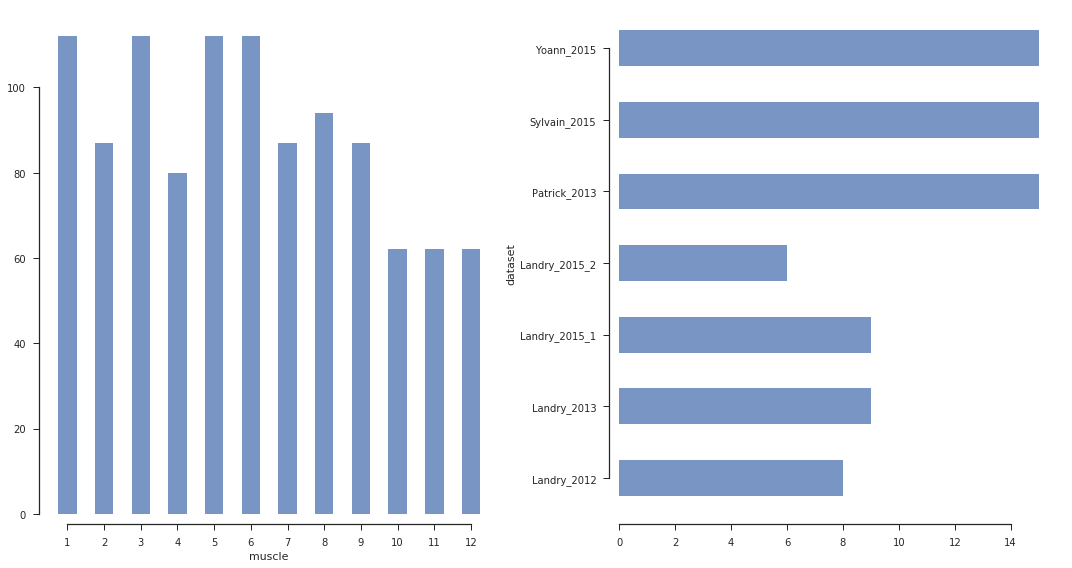

In [38]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 8))
table_muscle.drop('n', axis=1).loc['total'].plot.bar(ax=ax1, alpha=.75)
table_test.drop('total', axis=0)['n'].plot.barh(ax=ax2, alpha=.75)
sns.despine(offset=10, trim=True)
fig.tight_layout()

- Muscles `10`, `11` and `12`  (_intras_) have only $62$ mvc
- Muscles `1`, `3`, `5` and `6` have $112$ mvc
---
- The following datasets have performed the $15$ tests: `Yoann_2015`, `Sylvain_2015` and `Patrick_2013`
- `Landry_2015_2` have only $6$ tests and `Landry_2012` $8$

# 2. Datasets Homogeneity

In [21]:
max = df[df['relative_mvc'] == 100]
#max.pivot_table(values='test', index='dataset', columns='muscle', aggfunc=np.sum)
max.pivot_table(values='muscle', index='dataset', columns='test', aggfunc=np.sum)

test,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
dataset,,,,,,,,,,,,,,,
Landry_2012,9.0,69.0,52.0,73.0,27.0,197.0,38.0,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Landry_2013,22.0,91.0,129.0,76.0,38.0,120.0,87.0,109.0,NaN,NaN,NaN,NaN,NaN,NaN,140.0
Landry_2015_1,115.0,NaN,160.0,112.0,47.0,105.0,NaN,NaN,32.0,49.0,84.0,NaN,NaN,NaN,27.0
Landry_2015_2,40.0,NaN,46.0,37.0,59.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0
Patrick_2013,90.0,119.0,204.0,54.0,89.0,73.0,87.0,81.0,13.0,25.0,66.0,51.0,24.0,64.0,111.0
Sylvain_2015,50.0,37.0,98.0,40.0,12.0,91.0,15.0,37.0,23.0,25.0,64.0,56.0,24.0,14.0,42.0
Yoann_2015,24.0,190.0,316.0,24.0,69.0,187.0,18.0,67.0,25.0,51.0,62.0,79.0,12.0,84.0,230.0


# 3. Overall visualization

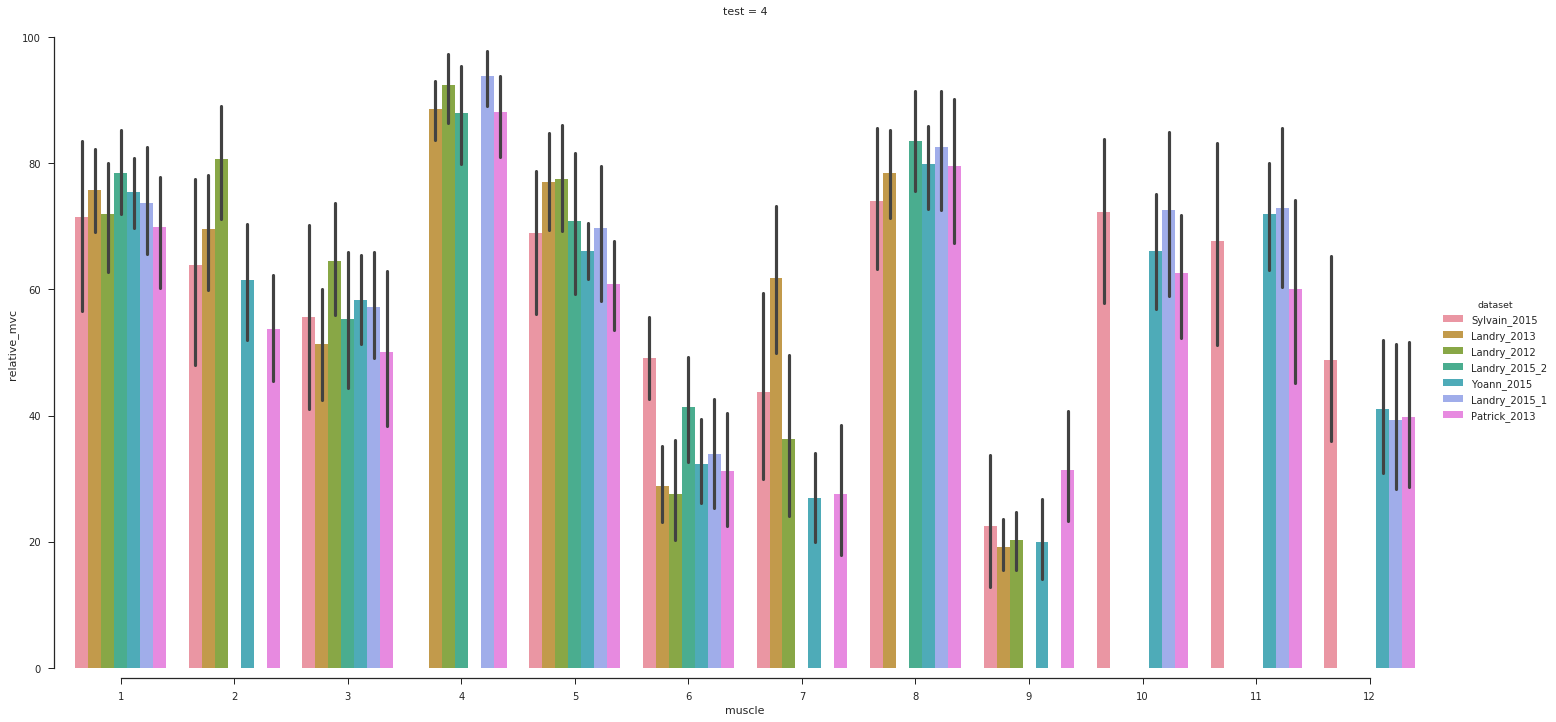

In [6]:
plt.figure(figsize=(45, 10))
sns.factorplot(x='muscle', y='relative_mvc',
               hue='dataset', row='test',
               data=df[df.test == 4], kind='bar',
               size=10, aspect=2)
sns.despine(offset=10, trim=True)
